In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

In [2]:
import sys
sys.path.append("../../simpsom")
import simpsom as sps

import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
labels = digits.target
data = np.array(df)

In [4]:
def run_experiment(data, PBC=True, init='PCA', metric='euclidean', topology='hexagonal', 
               GPU=False, neighborhood_fun='gaussian', train_algo='batch', early_stop=None,
               plotall=False, size=10, epochs=10):

    net = sps.SOMNet(size, size, data, PBC=PBC, init=init, metric=metric, random_seed=32, GPU=GPU, debug=True)
    net.train(train_algo=train_algo, start_learning_rate=0.01, epochs=epochs, batch_size=-1, early_stop=early_stop)

    if plotall:

        net.plot_map_by_feature(feature=1, show=True, print_out=False)
        _ = net.plot_map_by_difference(show=True, print_out=False, returns=False)

        _ = net.plot_projected_points(net.project_onto_map(data), 
                                     project=False, jitter=True, 
                                     show=True, print_out=False)
        _ = net.plot_projected_points(data, color_val=[n.difference for n in net.nodes_list],
                                     project=True, jitter=True, 
                                     show=True, print_out=False)

        labs, points = net.cluster(data, algorithm='AgglomerativeClustering')
        net.plot_clusters(data, labs, project=True, show=True)
        labs, points = net.cluster(data, algorithm='DBSCAN')
        net.plot_clusters(data, labs, project=True, show=True)
        labs, points = net.cluster(data, algorithm='KMeans')
        net.plot_clusters(data, labs, project=True, show=True)

        net.plot_convergence(fsize=(5, 5), logax=False)

In [5]:
GPU=False

confs = [
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'cosine', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'manhattan', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'mexican', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'bubble', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'cosine', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'manhattan', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':'bmudiff', 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':'mapdiff', 'plotall':False}, 
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':'mapdiff', 'plotall':True},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':True},
]

2022-06-11 17:50:07.076 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 17:50:07.077 | INFO     | simpsom.network:_set_weights:171 - The weights will be initialized with PCA.
2022-06-11 17:50:07.082 | INFO     | simpsom.network:train:364 - The map will be trained with the online algorithm.
2022-06-11 17:50:07.083 | WARNING  | simpsom.network:_randomize_dataset:269 - Epochs for online training are less than the input datapoints.
Training SOM... 0%7.084 | DEBUG    | simpsom.network:train:392 - 
2022-06-11 17:50:07.110 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 17:50:07.111 | INFO     | simpsom.network:_set_weights:171 - The weights will be initialized with PCA.
2022-06-11 17:50:07.115 | INFO     | simpsom.network:train:364 - The map will be trained with the online algorithm.
2022-06-11 17:50:07.117 | WARNING  | simpsom.network:_randomize_dataset:269 - Epochs for online training are less than the input datapoints.
Training SOM... 

CPU
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'cosine', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'manhattan', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


2022-06-11 17:50:07.177 | INFO     | simpsom.network:__init__:106 - Periodic Boundary Conditions active.
2022-06-11 17:50:07.178 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 17:50:07.179 | INFO     | simpsom.network:_set_weights:171 - The weights will be initialized with PCA.
2022-06-11 17:50:07.183 | INFO     | simpsom.network:train:364 - The map will be trained with the online algorithm.
2022-06-11 17:50:07.185 | WARNING  | simpsom.network:_randomize_dataset:269 - Epochs for online training are less than the input datapoints.
Training SOM... 0%7.186 | DEBUG    | simpsom.network:train:392 - 
2022-06-11 17:50:07.291 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 17:50:07.292 | INFO     | simpsom.network:_set_weights:171 - The weights will be initialized with PCA.
2022-06-11 17:50:07.296 | INFO     | simpsom.network:train:364 - The map will be trained with the online algorithm.
2022-06-11 17:50:07.298 | WARNING  | simpsom.network

{'PBC': True, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'square', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'mexican', 'train_algo': 'online', 'early_stop': None, 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'bubble', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


2022-06-11 17:50:07.395 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 17:50:07.396 | INFO     | simpsom.network:_set_weights:171 - The weights will be initialized with PCA.
2022-06-11 17:50:07.401 | INFO     | simpsom.network:train:364 - The map will be trained with the batch algorithm.
Training SOM... 0%7.403 | DEBUG    | simpsom.network:train:463 - 


{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


2022-06-11 17:50:07.766 | INFO     | simpsom.network:__init__:106 - Periodic Boundary Conditions active.
2022-06-11 17:50:07.768 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 17:50:07.769 | INFO     | simpsom.network:_set_weights:171 - The weights will be initialized with PCA.
2022-06-11 17:50:07.774 | INFO     | simpsom.network:train:364 - The map will be trained with the batch algorithm.
2022-06-11 17:50:07.776 | WARNING  | simpsom.network:train:416 - PBC currently unavailable for batch training and will be turned off.
Training SOM... 0%7.779 | DEBUG    | simpsom.network:train:463 - 


{'PBC': True, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


2022-06-11 17:50:08.164 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 17:50:08.166 | INFO     | simpsom.network:_set_weights:171 - The weights will be initialized with PCA.
2022-06-11 17:50:08.169 | INFO     | simpsom.network:train:364 - The map will be trained with the batch algorithm.
Training SOM... 0%8.171 | DEBUG    | simpsom.network:train:463 - 


{'PBC': False, 'init': 'PCA', 'metric': 'cosine', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


/Users/federico comitani/GitHub/simpsom/simpsom/distances.py:46: RuntimeWarning: invalid value encountered in true_divide
  similarity = self.xp.nan_to_num(num/denum)
2022-06-11 17:50:08.559 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 17:50:08.560 | INFO     | simpsom.network:_set_weights:171 - The weights will be initialized with PCA.
2022-06-11 17:50:08.565 | INFO     | simpsom.network:train:364 - The map will be trained with the batch algorithm.
Training SOM... 0%8.568 | DEBUG    | simpsom.network:train:463 - 


{'PBC': False, 'init': 'PCA', 'metric': 'manhattan', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


2022-06-11 17:50:08.986 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 17:50:08.987 | INFO     | simpsom.network:_set_weights:171 - The weights will be initialized with PCA.
2022-06-11 17:50:08.992 | INFO     | simpsom.network:train:364 - The map will be trained with the online algorithm.
2022-06-11 17:50:08.994 | WARNING  | simpsom.network:_randomize_dataset:269 - Epochs for online training are less than the input datapoints.
Training SOM... 0%8.996 | DEBUG    | simpsom.network:train:392 - 
2022-06-11 17:50:09.021 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 17:50:09.023 | INFO     | simpsom.network:_set_weights:171 - The weights will be initialized with PCA.
2022-06-11 17:50:09.029 | INFO     | simpsom.network:train:364 - The map will be trained with the online algorithm.
2022-06-11 17:50:09.031 | WARNING  | simpsom.network:_randomize_dataset:269 - Epochs for online training are less than the input datapoints.
Training SOM... 

{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': 'bmudiff', 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': 'mapdiff', 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': 'mapdiff', 'plotall': True}


Early stop tolerance reached at epoch 4, stopping training.456 - 


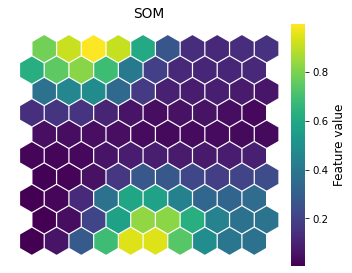

2022-06-11 17:50:09.478 | INFO     | simpsom.network:get_nodes_difference:554 - Weights difference among neighboring nodes calculated.


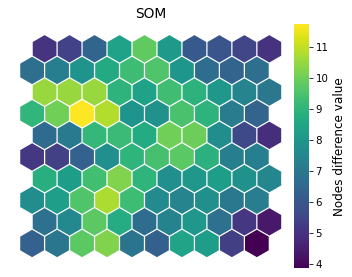

2022-06-11 17:50:09.619 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy


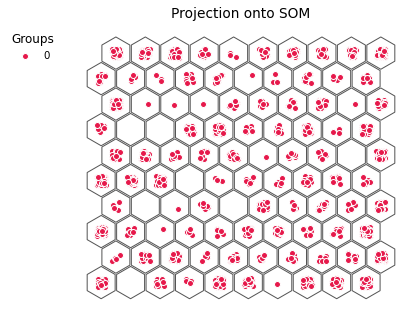

2022-06-11 17:50:09.746 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy


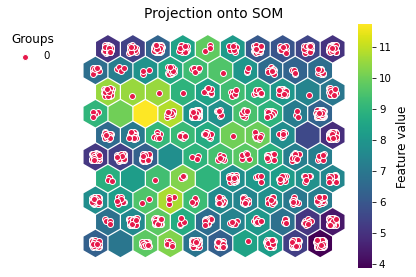

2022-06-11 17:50:09.943 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy
2022-06-11 17:50:10.011 | INFO     | simpsom.network:cluster:650 - Clustering results will be saved to:
././som_clusters.npy
2022-06-11 17:50:10.019 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy


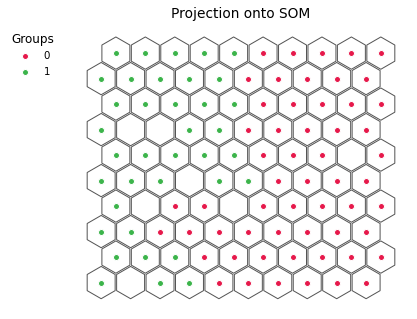

2022-06-11 17:50:10.549 | INFO     | simpsom.network:plot_clusters:853 - Clustering plot will be saved to:
././som_clustering.png
2022-06-11 17:50:10.554 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy
2022-06-11 17:50:10.567 | INFO     | simpsom.network:cluster:650 - Clustering results will be saved to:
././som_clusters.npy
2022-06-11 17:50:10.573 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy


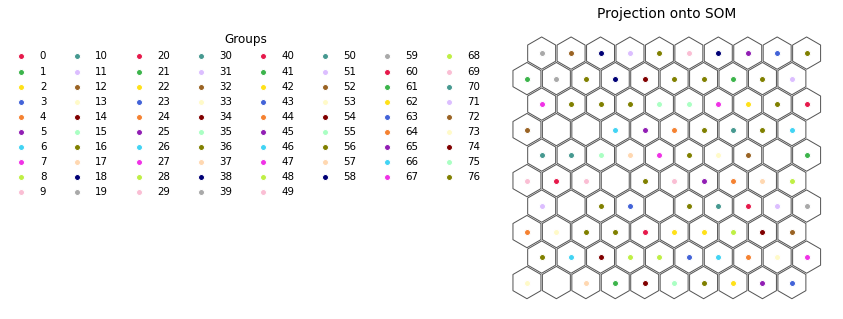

2022-06-11 17:50:14.736 | INFO     | simpsom.network:plot_clusters:853 - Clustering plot will be saved to:
././som_clustering.png
2022-06-11 17:50:14.743 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy
2022-06-11 17:50:14.823 | INFO     | simpsom.network:cluster:650 - Clustering results will be saved to:
././som_clusters.npy
2022-06-11 17:50:14.831 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy


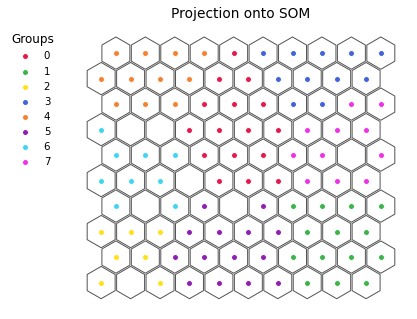

2022-06-11 17:50:15.657 | INFO     | simpsom.network:plot_clusters:853 - Clustering plot will be saved to:
././som_clustering.png
2022-06-11 17:50:16.004 | INFO     | simpsom.network:plot_convergence:762 - Convergence results will be saved to:
././som_convergence.png
2022-06-11 17:50:16.009 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 17:50:16.011 | INFO     | simpsom.network:_set_weights:171 - The weights will be initialized with PCA.
2022-06-11 17:50:16.015 | INFO     | simpsom.network:train:364 - The map will be trained with the online algorithm.
2022-06-11 17:50:16.017 | WARNING  | simpsom.network:_randomize_dataset:269 - Epochs for online training are less than the input datapoints.
Training SOM... 0%6.020 | DEBUG    | simpsom.network:train:392 - 


{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'square', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': True}


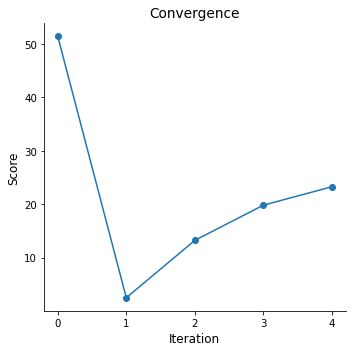

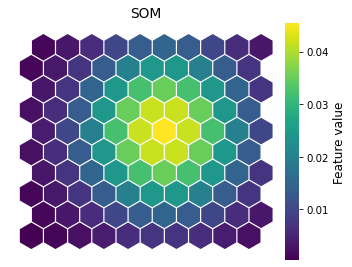

2022-06-11 17:50:16.322 | INFO     | simpsom.network:get_nodes_difference:554 - Weights difference among neighboring nodes calculated.


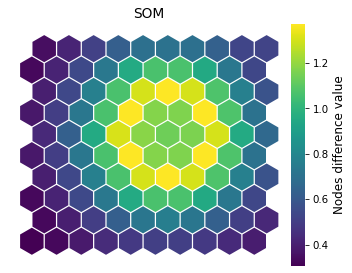

2022-06-11 17:50:16.461 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy


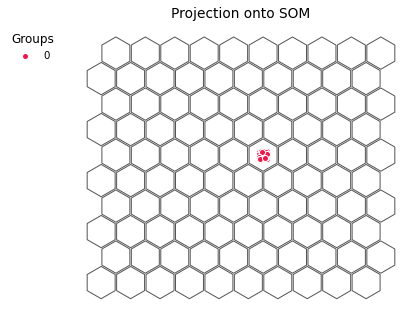

2022-06-11 17:50:16.598 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy


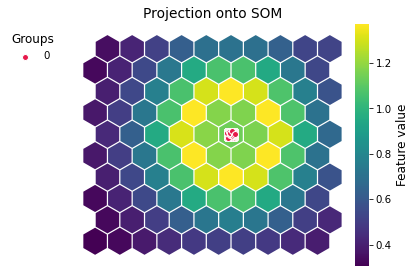

2022-06-11 17:50:16.778 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy
2022-06-11 17:50:16.836 | INFO     | simpsom.network:cluster:650 - Clustering results will be saved to:
././som_clusters.npy
2022-06-11 17:50:16.842 | INFO     | simpsom.network:project_onto_map:581 - Projected coordinates will be saved to:
././som_projected.npy


In [ ]:
print('CPU')
for conf in confs:
    print(conf)
    run_experiment(data, **conf)
print('All CPU tests done!')

In [ ]:
try:
    import cupy
    print('GPU')
    for conf in confs:
        print(conf)
        conf['GPU']=True
        run_experiment(data, **conf)
    print('All GPU tests done!')
except ImportError:
    print('No CuPy found, GPU tests will be skipped')